In [1]:
%matplotlib inline

In [2]:
import os
import json
import requests
from PIL import Image
from io import BytesIO

import numpy as np
import matplotlib.pyplot as plt

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [8.86532654e+02 2.44774826e+02 9.09756780e-01]
  [9.04193848e+02 2.44722153e+02 9.28162932e-01]
  ...
  [9.07007446e+02 3.68529938e+02 6.58853471e-01]
  [9.07049438e+02 3.68477905e+02 6.51642382e-01]
  [9.03923340e+02 3.68499268e+02 7.64168203e-01]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [8.12806946e+02 2.38926514e+02 9.14444029e-01]
  [8.30373413e+02 2.38888550e+02 8.55496228e-01]
  ...
  [8.36316040e+02 3.62394379e+02 4.77839708e-01]
  [8.36404419e+02 3.56683777e+02 5.02003849e-01]
  [8.36408752e+02 3.59617706e+02 6.23340547e-01]]

 [[1.68696008e+03 7.30380249e+02 8.10699642e-01]
  [1.68695325e+03 7.48137451e+02 8.83719146e-01]
  [1.66054810e+03 7.48063721e+02 9.17055726e-01]
  ...
  [1.67811780e+03 9.57138367e+02 7.61733055e-01]
  [1.66338733e+03 9.57044434e+02 8.07397723e-01]
  [1.68104114e+03 9.48248901e+02 7.56135404e-01]]

 ...

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [1.16016711e+03 7.78561831e+00 1.7958

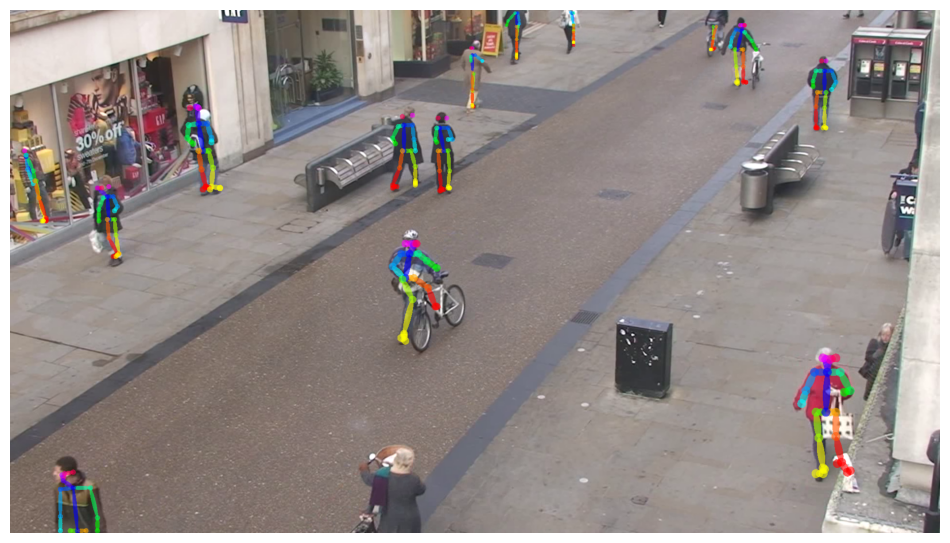

In [5]:
def show_image(img: np.ndarray):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(img)
    ax.axis("off")
    plt.savefig('output_001.png')
    plt.show()
    plt.close()


def pose_detection(src):
    """ Invoke OpenPose using our API (make sure the docker container is running first). """
    if isinstance(src, str) and os.path.exists(src):
        resp = requests.post('http://localhost:8081/inference', files={'file': open(src, 'rb')})
    elif isinstance(src, BytesIO):
        resp = requests.post('http://localhost:8081/inference', files={'file': src}, stream=True)
    else:
        raise ValueError(f'Invalid image input {src}!')

    data = resp.json()
    pose_keypoints_file = f"{os.getcwd()}{data['pose_name']}"
    pose_img_file = f"{os.getcwd()}{data['img_name']}"
    with open(pose_keypoints_file, 'r') as f:
        pose_data = np.array(json.loads(f.read())['poses'])
    pose_img = np.array(Image.open(pose_img_file))
    return pose_data, pose_img


img_file = './examples/example_001.png'
poses, img_pose = pose_detection(img_file)

print(poses)
show_image(img_pose)

We can also send an image represented as a numpy array to the API for inference.

Loaded Image: (1080, 1920, 3)
[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [8.86532654e+02 2.44774826e+02 9.09756780e-01]
  [9.04193848e+02 2.44722153e+02 9.28162932e-01]
  ...
  [9.07007446e+02 3.68529938e+02 6.58853471e-01]
  [9.07049438e+02 3.68477905e+02 6.51642382e-01]
  [9.03923340e+02 3.68499268e+02 7.64168203e-01]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [8.12806946e+02 2.38926514e+02 9.14444029e-01]
  [8.30373413e+02 2.38888550e+02 8.55496228e-01]
  ...
  [8.36316040e+02 3.62394379e+02 4.77839708e-01]
  [8.36404419e+02 3.56683777e+02 5.02003849e-01]
  [8.36408752e+02 3.59617706e+02 6.23340547e-01]]

 [[1.68696008e+03 7.30380249e+02 8.10699642e-01]
  [1.68695325e+03 7.48137451e+02 8.83719146e-01]
  [1.66054810e+03 7.48063721e+02 9.17055726e-01]
  ...
  [1.67811780e+03 9.57138367e+02 7.61733055e-01]
  [1.66338733e+03 9.57044434e+02 8.07397723e-01]
  [1.68104114e+03 9.48248901e+02 7.56135404e-01]]

 ...

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [1.1601

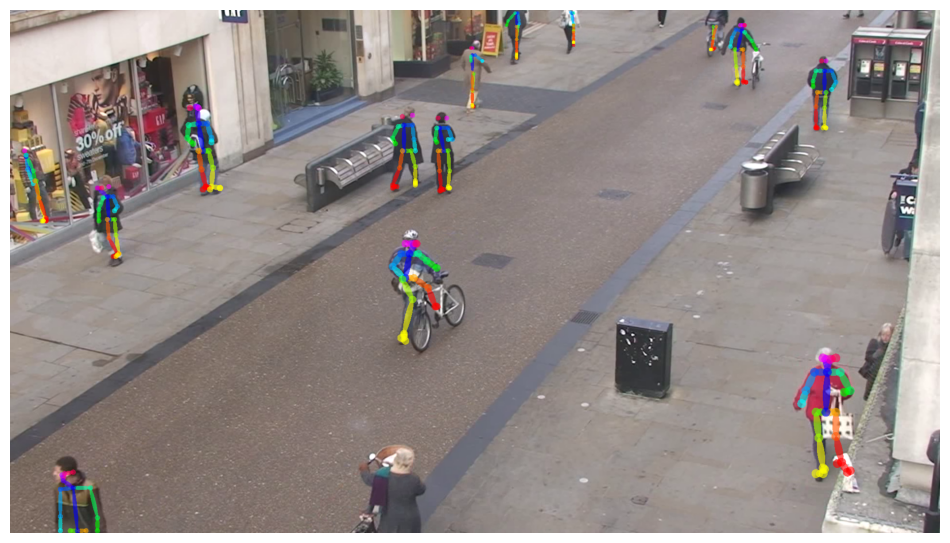

In [4]:
def numpy_to_binary(arr):
    try:
        im = Image.fromarray(arr)
        if im.mode in ("RGBA", "P"):
            im = im.convert("RGB")
        buf = BytesIO()
        im.save(buf, 'PNG', quality=100)
        buf.seek(0)  # to rewind the cursor to the start of the buffer
        return buf
    except Exception as e:
        print('Could not convert numpy array to binary', e)



img_arr = np.array(Image.open(img_file))
print(f'Loaded Image: {img_arr.shape}')

poses, img_pose = pose_detection(numpy_to_binary(img_arr))
print(poses)
show_image(img_pose)